Pruebas para leer O2 de BodySim


In [1]:
import numpy as np
import netCDF4

filename = '../body/Washington-1d-2008-09-12_compr.nc'
#varname = 'WQ_O'
#varname = 'WQ_N'
#varname='WQ_ALG'
varname = 'Temp'
nc = netCDF4.Dataset(filename)
# File info format HDF5:

# File info
print(nc) # General attributes
print(nc.dimensions)
print(nc.variables.keys()) # All variables names
print(nc.variables) # All variables and their attributes

# Read variables
#   Not all variables have the same dimensions, see file info for details
lat = np.array(nc['lat'])
lon = np.array(nc['lon'])
bottom = np.array(nc['Bottom'])
time= np.array(nc['time'])
layers= np.array(nc['layers'])
var= np.array(nc[varname])

# Remove fill values
#   The cells in which no water is present are filled with FillValue
#   Change FillValue to NaN so that those cells don't appear in the plot
lat[lat == nc['lat'].FillValue] = np.nan
lon[lon == nc['lon'].FillValue] = np.nan
bottom[bottom== nc['Bottom'].FillValue]=np.nan
var[var== nc[varname].FillValue]=np.nan


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): col(78), row(62), cnr(4), lyr(55), time(2881), nalg(1)
    variables(dimensions): float32 lon(row, col), float32 lat(row, col), float32 lon_bnds(row, col, cnr), float32 lat_bnds(row, col, cnr), float32 layers(row, col), float32 sigma(row, lyr, col), float32 time(time), float32 Bottom(row, col), float32 WSEL(time, row, col), float32 Vx(time, row, col, lyr), float32 Vy(time, row, col, lyr), float32 Vz(time, row, col, lyr), float32 Wx(time, row, col), float32 Wy(time, row, col), float32 Temp(time, row, col, lyr), float32 WQ_ALG(time, row, col, lyr, nalg), float32 WQ_C(time, row, col, lyr), float32 WQ_P(time, row, col, lyr), float32 WQ_N(time, row, col, lyr), float32 WQ_S(time, row, col, lyr), float32 WQ_O(time, row, col, lyr)
    groups: 
{'col': <class 'netCDF4._netCDF4.Dimension'>: name = 'col', size = 78, 'row': <class 'netCDF4._netCDF4.Dimension'>: name = 'row', size = 

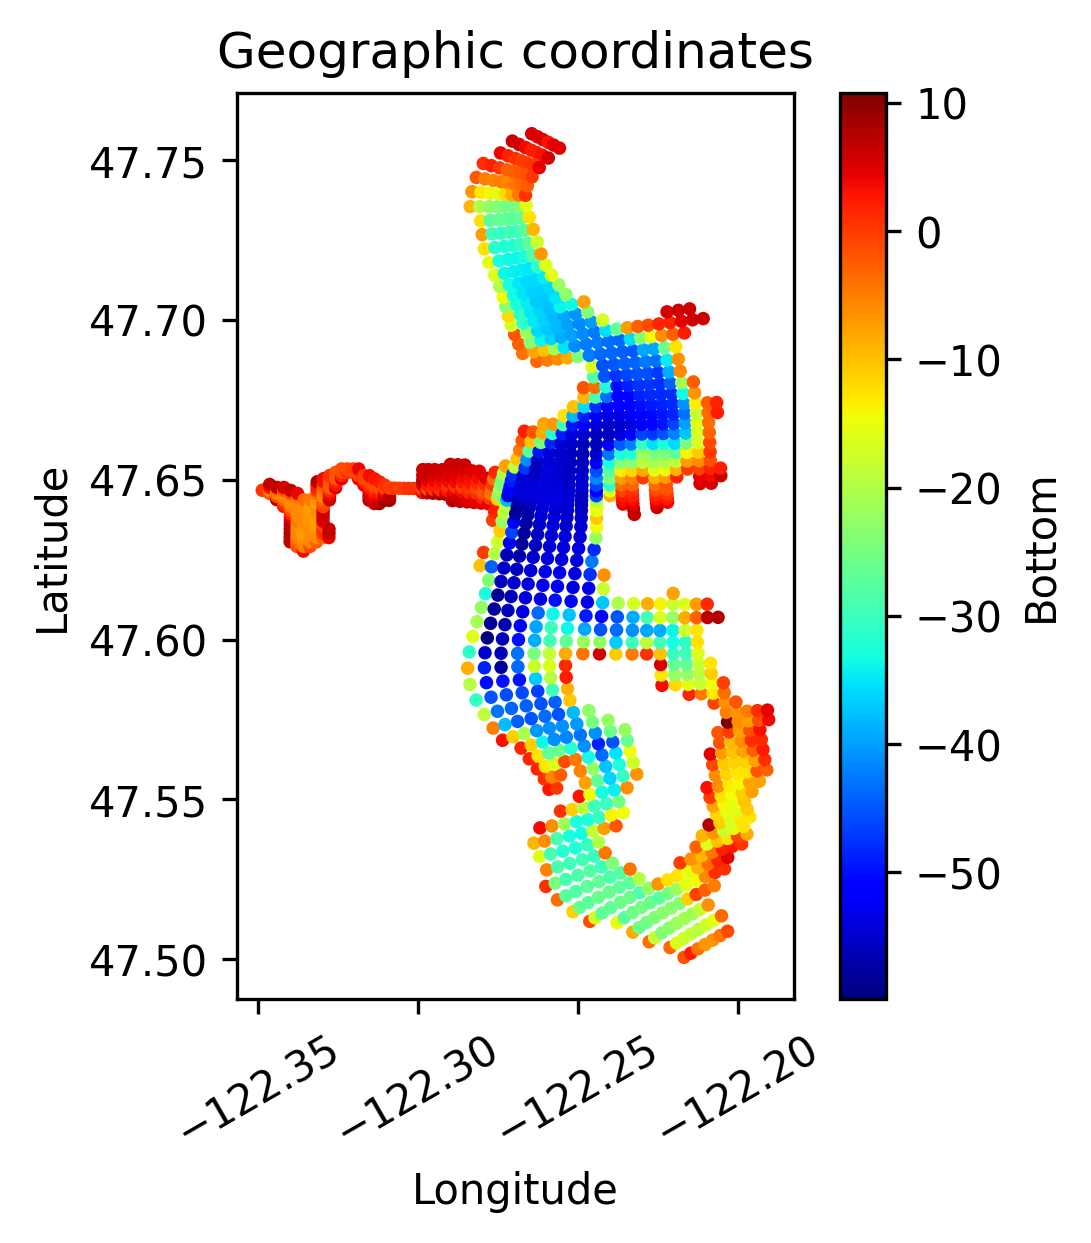

In [2]:

# Plots
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(lon,lat,c=bottom[:,:] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label('Bottom')
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()


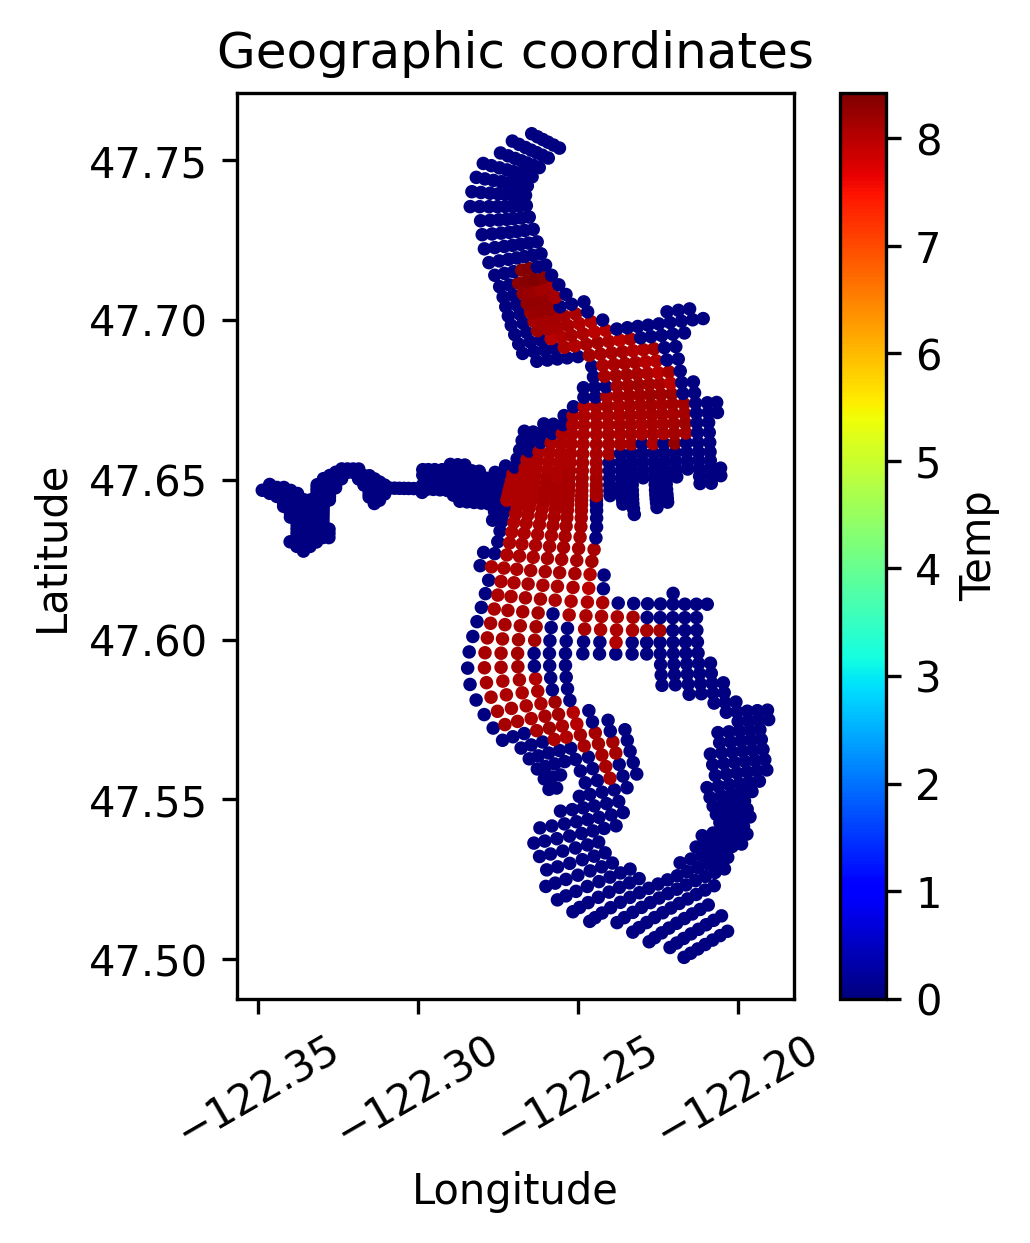

In [3]:
# Plots
import matplotlib.pyplot as plt
myt=1500
mylyr=20
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(lon,lat,c=var[myt,:,:,mylyr] , s=5, cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('Longitude'), plt.xticks(rotation=30)
plt.ylabel('Latitude')
cbar.set_label(varname)
plt.title('Geographic coordinates')
plt.gca().set_aspect('equal')
plt.show()


In [4]:
# Pruebas de Segundo  
from scipy.interpolate import griddata

latflat = lat[np.logical_not(np.isnan(lat))]
lonflat = lon[np.logical_not(np.isnan(lon))]
lonflat = lon[np.logical_not(np.isnan(lon))]
timeflat= time[np.logical_not(np.isnan(time))]
layersflat=layers[np.logical_not(np.isnan(layers))]


myt=10
mylyr=4
mylat=47.65
mylon=122.25

vartl=var[myt,:,:,mylyr]
varflat=vartl[np.logical_not(np.isnan(vartl))]


ilatf=np.argmin(np.abs(latflat-mylat))
ilonf=np.argmin(np.abs(lonflat-[mylon]))
print(ilatf)
print(ilonf)
#var[10,:,:,4]
nlat=latflat[ilatf]
nlon=lonflat[ilonf]
print(nlat)
print(nlon)

print(varflat[ilatf,ilonf])



279
1181
47.650024
-122.19026


IndexError: too many indices for array